In [32]:
import pandas as pd

In [53]:
raw_df = pd.read_csv('../data/raw_data/netflix_titles.csv')

In [87]:
raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Df Info

In [89]:
#722432 rows, 12 columns
raw_df.info() #columns dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [90]:
raw_df.isna().sum() #now whe have the null data 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

For recommendation system, dont need 'director', 'cast', 'rating' or 'date_added' so we dont drop those rows...
besides we need 'duration' and 'country',  so we will drop data that contains realise date null values, due to we cannot imputate objects like countrys case    

In [91]:
new_df = raw_df.dropna(subset=['duration','country'],axis='index')
new_df.isna().sum() #now we have to treat rutime nulls

show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           0
listed_in          0
description        0
dtype: int64

# Null implicit data

Lets find null not explicit data

In [98]:
for col in new_df:
    print(f'for column: "{col}" we have {(new_df[col] == 0).value_counts()[0]}  false null values')

for column: "show_id" we have 7973  false null values
for column: "type" we have 7973  false null values
for column: "title" we have 7973  false null values
for column: "director" we have 7973  false null values
for column: "cast" we have 7973  false null values
for column: "country" we have 7973  false null values
for column: "date_added" we have 7973  false null values
for column: "release_year" we have 7973  false null values
for column: "rating" we have 7973  false null values
for column: "duration" we have 7973  false null values
for column: "listed_in" we have 7973  false null values
for column: "description" we have 7973  false null values


/tmp/ipykernel_788/3242723938.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'for column: "{col}" we have {(new_df[col] == 0).value_counts()[0]}  false null values')


# Columns to work on for recomendation system: DATASET: 'netflix_titles' ; categories: [type, country, release_year, duration, listed_in(genre)] 7973   elements

In [208]:
recomendation_df = new_df[['title', 'type', 'country', 'release_year','duration','listed_in','director','description','cast']]
#note we will keep description, cast and director columns for database purposes

In [209]:
recomendation_df.columns = ['title', 'type', 'country', 'release_year','duration','genres','director','description','cast']

In [210]:
recomendation_df = recomendation_df.reset_index(drop=True)
recomendation_df

,title,type,country,release_year,duration,genres,director,description,cast
0,Dick Johnson Is Dead,Movie,United States,2020,90 min,Documentaries,Kirsten Johnson,"As her father nears the end of his life, filmm...",NaN
1,Blood & Water,TV Show,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN,"After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Kota Factory,TV Show,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN,In a city of coaching centers known to train I...,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
3,Sankofa,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies",Haile Gerima,"On a photo shoot in Ghana, an American model s...","Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
4,The Great British Baking Show,TV Show,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV",Andy Devonshire,A talented batch of amateur bakers face off in...,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
...,...,...,...,...,...,...,...,...,...
7968,Zinzana,Movie,"United Arab Emirates, Jordan",2015,96 min,"Dramas, International Movies, Thrillers",Majid Al Ansari,Recovering alcoholic Talal wakes up inside a s...,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
7969,Zodiac,Movie,United States,2007,158 min,"Cult Movies, Dramas, Thrillers",David Fincher,"A political cartoonist, a crime reporter and a...","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
7970,Zombieland,Movie,United States,2009,88 min,"Comedies, Horror Movies",Ruben Fleischer,Looking to survive in a world taken over by zo...,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
7971,Zoom,Movie,United States,2006,88 min,"Children & Family Movies, Comedies",Peter Hewitt,"Dragged from civilian life, a former superhero...","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


# Lets see razonable unique values from each columns

In [134]:
#unique values for column
unique_vals = {}
columnas = ['type','country','release_year']
for col in recomendation_df:
    if col in columnas:
        unique_vals[col] = recomendation_df[col].unique() 


In [135]:
#type column
unique_vals['type']

array(['Movie', 'TV Show'], dtype=object)

<Axes: xlabel='type'>

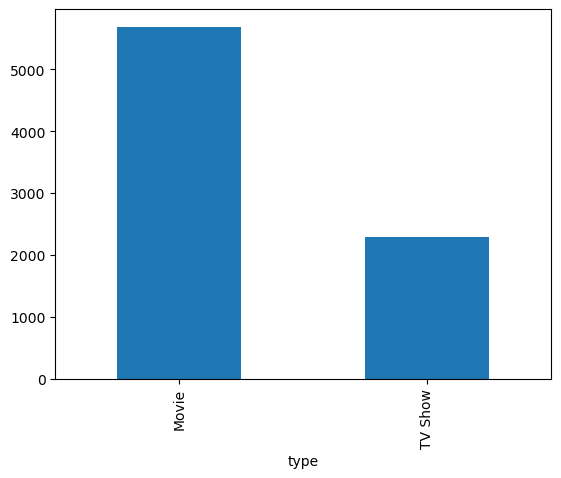

In [163]:
recomendation_df['type'].value_counts().plot(kind='bar')

In [192]:
#country column
unique_countries = []
for row in recomendation_df['country']:
    for country in row.split(','):
        unique_countries.append(country)
unique_vals['country'] = set(unique_countries)
len(unique_vals['country']) 
unique_vals['country']


{'',
 ' Afghanistan',
 ' Albania',
 ' Algeria',
 ' Angola',
 ' Argentina',
 ' Armenia',
 ' Australia',
 ' Austria',
 ' Azerbaijan',
 ' Bahamas',
 ' Bangladesh',
 ' Belgium',
 ' Bermuda',
 ' Botswana',
 ' Brazil',
 ' Bulgaria',
 ' Burkina Faso',
 ' Cambodia',
 ' Canada',
 ' Cayman Islands',
 ' Chile',
 ' China',
 ' Colombia',
 ' Croatia',
 ' Cuba',
 ' Czech Republic',
 ' Denmark',
 ' Dominican Republic',
 ' East Germany',
 ' Ecuador',
 ' Egypt',
 ' Ethiopia',
 ' Finland',
 ' France',
 ' Germany',
 ' Ghana',
 ' Greece',
 ' Guatemala',
 ' Hong Kong',
 ' Hungary',
 ' Iceland',
 ' India',
 ' Indonesia',
 ' Iran',
 ' Iraq',
 ' Ireland',
 ' Israel',
 ' Italy',
 ' Japan',
 ' Jordan',
 ' Kazakhstan',
 ' Kenya',
 ' Kuwait',
 ' Latvia',
 ' Lebanon',
 ' Liechtenstein',
 ' Lithuania',
 ' Luxembourg',
 ' Malawi',
 ' Malaysia',
 ' Malta',
 ' Mexico',
 ' Mongolia',
 ' Montenegro',
 ' Morocco',
 ' Namibia',
 ' Nepal',
 ' Netherlands',
 ' New Zealand',
 ' Nicaragua',
 ' Nigeria',
 ' Norway',
 ' Pakistan

In [155]:
# release_year column
unique_vals['release_year']

array([2020, 2021, 1993, 2018, 1998, 2010, 2013, 2017, 1975, 1978, 1983,
       1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008, 2009, 2007,
       2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990, 1991, 1999,
       1986, 1992, 1996, 1984, 1997, 1980, 1961, 1995, 1985, 2000, 1976,
       1959, 1988, 1972, 1981, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1946, 1942, 1955, 1944, 1947, 1943])

<Axes: title={'center': 'count of movies/series vs release year'}, xlabel='release_year'>

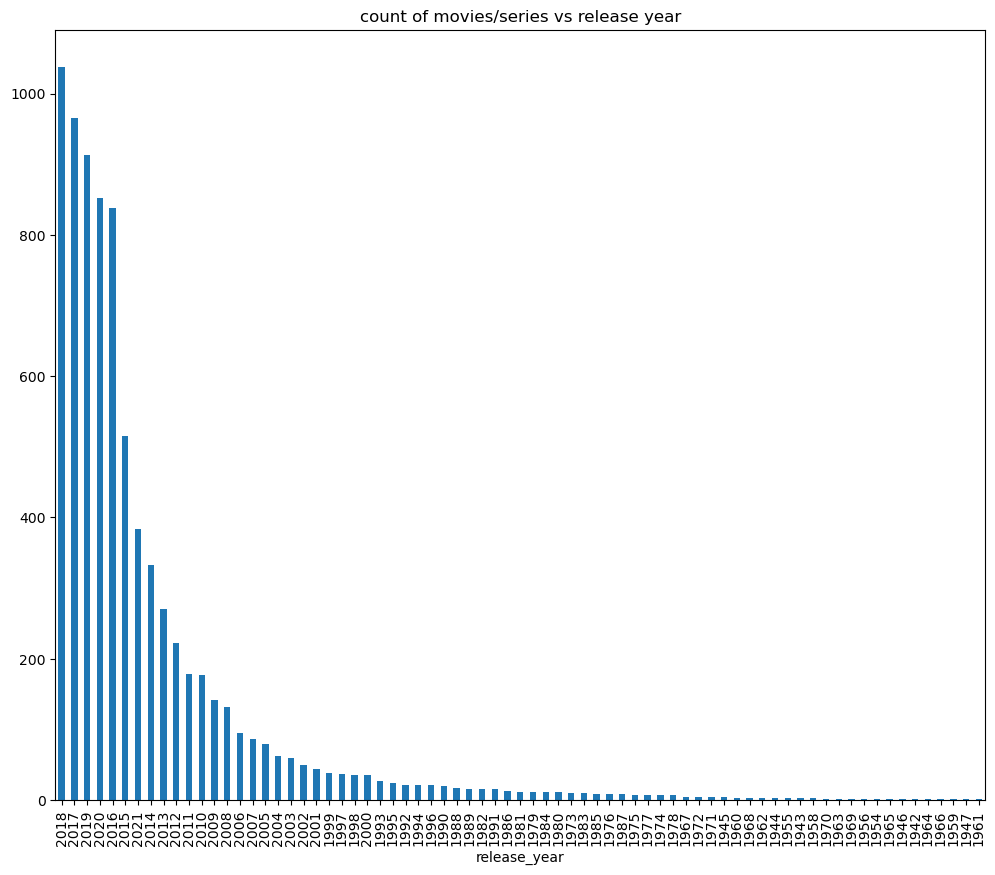

In [176]:
recomendation_df['release_year'].value_counts().plot(kind='bar',rot=90,figsize=(12,10),title='count of movies/series vs release year')

In [203]:
#genre column
unique_genres = []
for row in recomendation_df['genres']:
    for genre in row.split(','):
        unique_genres.append(genre)
unique_vals['genres'] = set(unique_genres)
len(unique_vals['genres']) #73 genres
unique_vals['genres']

{' Anime Features',
 ' Children & Family Movies',
 ' Classic & Cult TV',
 ' Classic Movies',
 ' Comedies',
 ' Crime TV Shows',
 ' Cult Movies',
 ' Documentaries',
 ' Docuseries',
 ' Dramas',
 ' Faith & Spirituality',
 ' Horror Movies',
 ' Independent Movies',
 ' International Movies',
 ' International TV Shows',
 " Kids' TV",
 ' Korean TV Shows',
 ' LGBTQ Movies',
 ' Music & Musicals',
 ' Reality TV',
 ' Romantic Movies',
 ' Romantic TV Shows',
 ' Sci-Fi & Fantasy',
 ' Science & Nature TV',
 ' Spanish-Language TV Shows',
 ' Sports Movies',
 ' Stand-Up Comedy',
 ' Stand-Up Comedy & Talk Shows',
 ' TV Action & Adventure',
 ' TV Comedies',
 ' TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 ' TV Sci-Fi & Fantasy',
 ' TV Thrillers',
 ' Teen TV Shows',
 ' Thrillers',
 'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',

We have too many genres for our purposes. we need to reduce them to [drama, horror, comedy, action,music, sports,documental,]

Also we get some other categories like movie or tv[from year column], old or new [from release year column], short or long[from duration column], local or foregin [from country column]

In [213]:
recomendation_df.to_json('../data/proccesed_data/system_recomendation')